# Extract bullet from pic sprite sheet

In [1]:
from IPython.display import display, HTML
#Enable horizontal scrolling on output
#display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Increase the width
display(HTML("<style>.container { width:80% !important; }</style>"))


Convert cry files to rgb arrays that we can use to create and extract images.

In [2]:
CRY_RGB = [
[
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113, 85],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255]
    ],
[
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,32,65,98,131,164,197,230,255,255,255,255,255,255,255,255],
    [0,30,61,91,133,153,183,214,244,255,255,255,255,255,255,255],
    [0,28,56,85,113,141,170,198,226,255,255,255,255,255,255,255],
    [0,26,52,78,104,130,156,182,208,234,255,255,255,255,255,255],
    [0,23,47,71,95,119,142,166,190,214,238,255,255,255,255,255],
    [0,21,43,64,86,107,129,150,172,193,215,236,255,255,255,255],
    [0,19,38,57,77,96,115,134,154,173,192,211,231,250,255,255],
    [0,17,34,51,68,85,102,119,136,153,170,187,204,221,238,255]
],
[
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255],
    [255,255,255,255,255,255,255,255,255,255,255,255,255,255,240,221],
    [255,255,255,255,255,255,255,255,255,255,255,255,252,230,208,187],
    [255,255,255,255,255,255,255,255,255,255,255,248,224,200,177,153],
    [255,255,255,255,255,255,255,255,255,255,249,223,197,171,145,119],
    [255,255,255,255,255,255,255,255,255,255,227,198,170,141,113,85],
    [255,255,255,255,255,255,255,255,255,235,204,173,143,112,81,51],
    [255,255,255,255,255,255,255,255,247,214,181,148,115,82,49,17],
    [237,237,237,237,237,237,237,237,230,197,164,131,98,65,32,0],
    [203,203,203,203,203,203,203,203,203,203,153,122,91,61,30,0],
    [169,169,169,169,169,169,169,169,169,170,141,113,85,56,28,0],
    [135,135,135,135,135,135,135,135,135,135,135,104,78,52,26,0],
    [102,102,102,102,102,102,102,102,102,102,102,95,71,47,23,0],
    [68,68,68,68,68,68,68,68,68,68,68,68,64,43,21,0],
    [34,34,34,34,34,34,34,34,34,34,34,34,34,34,19,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]
]

In [3]:
import math
from PIL import Image, ImageColor
import numpy as np

def saturate(c,intensity):
    # Modify them using the intensity value
    c = c * (intensity / 255.0)
    c = math.ceil(c+0.5)
    # Clamp the value between 0 and 255
    return max(0, min(c,255))
    
def cry_to_rgb(d):
    # For example value of d: 0x1A20
    intensity = d & 0xFF   # get the intensity: 0x20
    cr1 = (d >> 12) & 0xF  # get index 1: 0x0A (10)
    cr2 = (d >> 8) & 0xF   # get index 2: 0x01 (1)
    
    # Use the indices to get the RGB values from our
    # lookup table
    r = CRY_RGB[0][cr1][cr2]
    g = CRY_RGB[1][cr1][cr2]
    b = CRY_RGB[2][cr1][cr2]

    # Ensure we get a valid rgb value between 0 and 255
    r1 = saturate(r, intensity)
    g1 = saturate(g, intensity)
    b1 = saturate(b, intensity)

    return (r1,g1,b1)

def getPixels(file_name):
    width = 320
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

##  Get the bullet in the sprite sheet

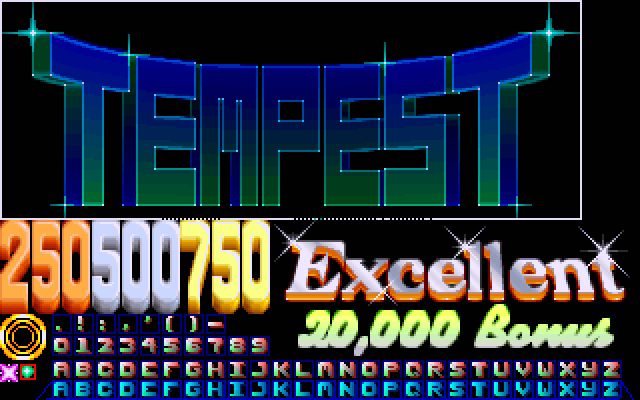

In [18]:
from PIL import ImageDraw
pixels = getPixels('cry/beasty3.cry')
subpixels = pixels
img = Image.fromarray(subpixels,mode='RGB')

draw = ImageDraw.Draw(img)
"""
        ; Construct a solid polygon bullet instead of a vector based one.
oaafire:move.l #$00b6000a,d0         ; x/y for the default bullet in sprite sheet 'pic'.
        move.l #$00070007,d1         ; width/height for the default bullet in sprite sheet 'pic'.
"""
draw.rectangle(((0x0a, 0xb6), (0x0a+0x07, 0xb6+0x07)), outline="red")

img = img.resize((img.width * 2, img.height * 2), Image.NEAREST)
img

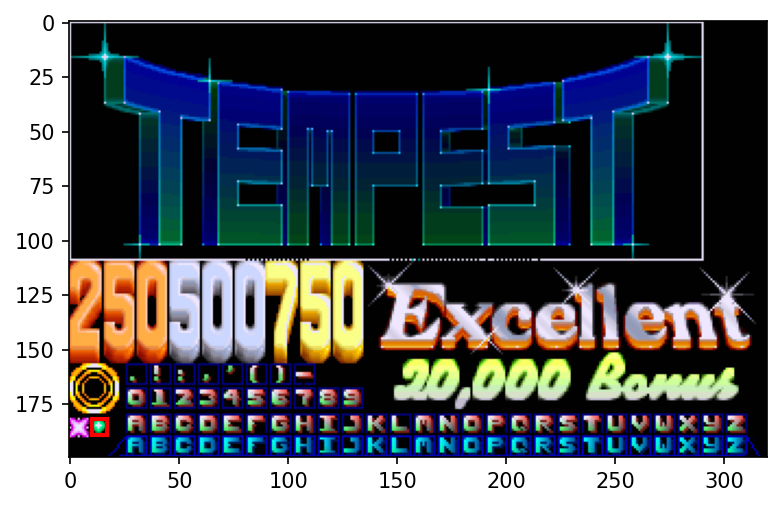

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

pixels = getPixels('cry/beasty3.cry')
subpixels = pixels
im = Image.fromarray(subpixels,mode='RGB')
plt.rcParams['figure.dpi'] = 150

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)
# Create a Rectangle patch
rect = patches.Rectangle((0x0a, 0xb6), 0x07, 0x7, linewidth=2, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

In [22]:
int(0xb6)

182

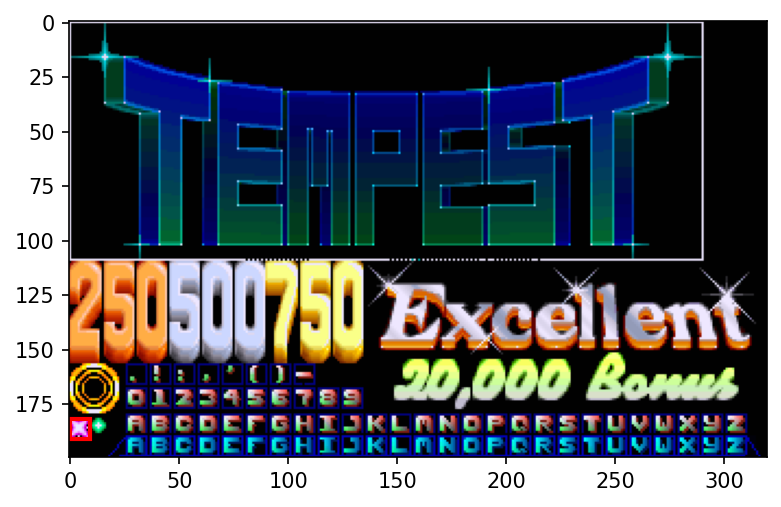

In [21]:

pixels = getPixels('cry/beasty3.cry')
subpixels = pixels
im = Image.fromarray(subpixels,mode='RGB')

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(im)
# Create a Rectangle patch
rect = patches.Rectangle((0x00, 0xb6), 0x09, 0x9, linewidth=2, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

# Rough Work